<a href="https://colab.research.google.com/github/jaffaraleem/EM-Algortihm/blob/main/EMalgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary modules and libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.stats import multivariate_normal
import math
import numpy as np

In [4]:
#Reading the clusters.txt file
data_file = open('/content/drive/MyDrive/Colab Notebooks/ee541/HW2/cluster.txt', "r")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Splitting the data into lists of X,Y and Class
class_data=[]
x_data =[]
y_data = []
for i in data_file:
    i=i.strip()
    if(i[0]!="#"):
        d = i.split(" ")
        x_data.append(float(d[0]))
        y_data.append(float(d[1]))
        class_data.append(d[2])

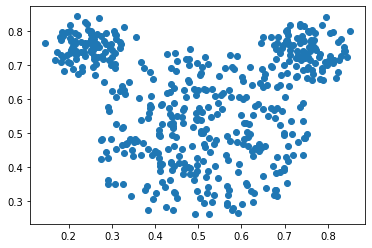

In [7]:
#Creating an array for X and Y elements and creating a scatter plot for raw data
X = np.array(x_data)
Y = np.array(y_data)
plt.scatter(X,Y)
plt.show()

In [8]:
#Using the KMeans clustering model with 3 clusters
km = KMeans(n_clusters = 3, random_state=42)

In [9]:
#Converting X and Y arrays to a 2D array
data = np.vstack((X, Y)).T

In [10]:
#Fitting the raw data to the K Means Clustering model
y_predicted = km.fit_predict(data)
y_predicted

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [11]:
#Splitting the X,Y into different classes from the model
classER_x = []
classER_y = []
classHD_x = []
classHD_y = []
classEL_x = []
classEL_y = []
for i in range(0,len(y_predicted)):
  if(y_predicted[i]==0):
    classHD_x.append(data[i][0])
    classHD_y.append(data[i][1])
  elif(y_predicted[i]==1):
    classER_x.append(data[i][0])
    classER_y.append(data[i][1])
  else:
    classEL_x.append(data[i][0])
    classEL_y.append(data[i][1])   

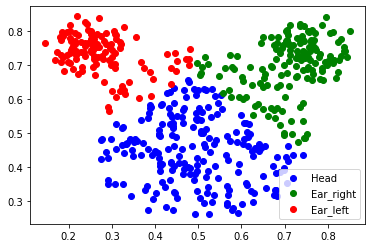

In [12]:
#Plotting the data with clusters
plt.scatter(classHD_x,classHD_y, color = "blue", label="Head")
plt.scatter(classER_x,classER_y, color = "green", label = "Ear_right")
plt.scatter(classEL_x,classEL_y, color = "red", label = "Ear_left")
plt.legend(loc = "lower right")

In [13]:
#Converting the str labels of class to numbers Head -> 0, Ear_right -> 1, Ear_left -> 2,
actual_classes = []
for i in class_data:
  if(i == "Head"):
    actual_classes.append(0)
  elif(i == "Ear_right"):
    actual_classes.append(1)
  else:
    actual_classes.append(2)

In [14]:
#Creating the confusion matrix
results = confusion_matrix(actual_classes, y_predicted)
results

array([[211,  54,  25],
       [  0, 100,   0],
       [  0,   0, 100]])

In [15]:
# 2b Implementing Expectation Maximisation Algorithm

In [16]:
#Creating data array for the EM Algorithm
classX=[]
classY = []
for i in classHD_x:
  classX.append(i)
for i in classER_x:
  classX.append(i)
for i in classEL_x:
  classX.append(i)

for i in classHD_y:
  classY.append(i)
for i in classER_y:
  classY.append(i)
for i in classEL_y:
  classY.append(i)

cluster_data = np.vstack((classX,classY)).T

In [17]:
def plot_graph(muHD,muER,muEL,gm,cluster_data):
  classes_EM=[]
  Head_Class_x = []
  Head_Class_y = []
  ER_Class_x = []
  ER_Class_y = []
  EL_Class_x = []
  EL_Class_y = []
  HD= 0
  ER = 0
  EL =0
  for i,j in zip(gm, cluster_data):
    k = i.index(max(i))
    if(k == 0):
      HD +=1
      Head_Class_x.append(j[0])
      Head_Class_y.append(j[1])

    elif(k == 1):
      ER +=1
      ER_Class_x.append(j[0])
      ER_Class_y.append(j[1])

    else:
      EL +=1
      EL_Class_x.append(j[0])
      EL_Class_y.append(j[1])

    classes_EM.append(k)

  plt.scatter(Head_Class_x,Head_Class_y, color = "blue", label="Head")
  plt.scatter(ER_Class_x,ER_Class_y, color = "green", label = "Ear_right")
  plt.scatter(EL_Class_x,EL_Class_y, color = "red", label = "Ear_left")
  plt.scatter([muHD[0]],[muHD[1]], color = "yellow" )
  plt.scatter([muER[0]],[muER[1]], color = "black" )
  plt.scatter([muEL[0]],[muEL[1]], color = "purple" )
  plt.legend(loc = "lower right")
  plt.show()

  return [HD, ER, EL]

In [18]:
# To calculate sum of each gamma
def prob_sums_of_each_cluster(arr):
  sHD = 0
  sER = 0
  sEL = 0
  for i in gm:
    sHD += i[0]
    sER += i[1]
    sEL += i[2] 
  return sHD, sER, sEL

In [19]:
# Implementation of M Step
def MStep(gm, arr):
  sxHD = 0
  sxER = 0
  sxEL = 0
  syHD = 0
  syER = 0
  syEL = 0
  sigmaHD_num = np.array([[0,0],[0,0]],dtype=float)
  sigmaER_num = np.array([[0,0],[0,0]],dtype=float)
  sigmaEL_num = np.array([[0,0],[0,0]],dtype=float)

  sum_HD_prob, sum_ER_prob, sum_EL_prob = prob_sums_of_each_cluster(gm) 
  
  for i in range(len(arr)):
    sxHD += gm[i][0]*arr[i][0]
    syHD += gm[i][0]*arr[i][1]

    sxER += gm[i][1]*arr[i][0]
    syER += gm[i][1]*arr[i][1]

    sxEL += gm[i][2]*arr[i][0]
    syEL += gm[i][2]*arr[i][1]

  muHDx = sxHD/sum_HD_prob
  muHDy = syHD/sum_HD_prob
  muHD = np.array([[muHDx],[muHDy]])

  muERx = sxER/sum_ER_prob
  muERy = syER/sum_ER_prob
  muER = np.array([[muERx],[muERy]])

  muELx = sxEL/sum_EL_prob
  muELy = syEL/sum_EL_prob
  muEL = np.array([[muELx],[muELy]])

  for i in range(len(arr)):
    e = arr[i].reshape(2,1)
    
    diffHD = (e-muHD)
    prodHD = np.dot(diffHD,diffHD.T)
    sigmaHD_num += gm[i][0]*prodHD

    diffER = (e-muER)
    prodER = np.dot(diffER,diffER.T)
    sigmaER_num += gm[i][1]*prodER

    diffEL = (e-muEL)
    prodEL = np.dot(diffEL,diffEL.T)
    sigmaEL_num += gm[i][2]*prodEL

  sigmaHD = sigmaHD_num/sum_HD_prob
  sigmaER = sigmaER_num/sum_ER_prob
  sigmaEL = sigmaEL_num/sum_EL_prob

  w_0 = sum_HD_prob/490
  w_1 = sum_ER_prob/490
  w_2 = sum_EL_prob/490

  return muHD,muER,muEL, w_0,w_1,w_2, sigmaHD, sigmaER, sigmaEL

In [20]:
#Implementation of E Step
def EStep(muHD,muER,muEL,w_0,w_1,w_2,sigmaHD,sigmaER,sigmaEL,data):
  gm = []
  for i in data:
    pdf_HD = w_0 * multivariate_normal.pdf(i,mean=muHD.reshape(2,),cov = sigmaHD)
    pdf_ER = w_1 * multivariate_normal.pdf(i,mean=muER.reshape(2,),cov = sigmaER)
    pdf_EL = w_2 * multivariate_normal.pdf(i,mean=muEL.reshape(2,),cov = sigmaEL)
    gm_HD = pdf_HD/(pdf_HD+pdf_EL+pdf_ER)
    gm_ER = pdf_ER/(pdf_HD+pdf_EL+pdf_ER)
    gm_EL = pdf_EL/(pdf_HD+pdf_EL+pdf_ER)
    gm.append([gm_HD, gm_ER, gm_EL])
  return gm

In [21]:
#Initializing Gamma vectors with one hot encoding
gm = []
for i in range(0,211):
  gm.append([1,0,0])
for i in range(0,154):
  gm.append([0,1,0])
for i in range(0,125):
  gm.append([0,0,1])

In [22]:
muHD,muER,muEL, w_0,w_1,w_2, sigmaHD, sigmaER, sigmaEL = MStep(gm,cluster_data)
print(muHD,muER,muEL,sigmaHD,  sigmaER, sigmaEL )

[[0.49244835]
 [0.44985859]] [[0.71042841]
 [0.6952667 ]] [[0.27459845]
 [0.73311733]] [[ 0.01173546 -0.0016364 ]
 [-0.0016364   0.00908443]] [[0.00606442 0.00179403]
 [0.00179403 0.0068253 ]] [[ 0.00543206 -0.00141728]
 [-0.00141728  0.00298001]]


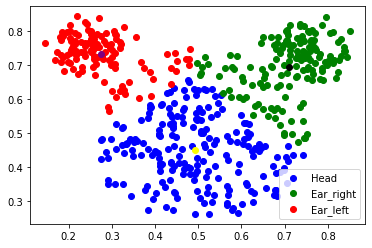

After 1 Iteration (Head , Ear_Right, Ear_Left) = (211 ,154, 125)


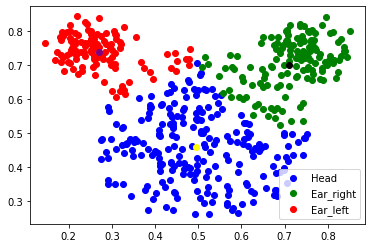

After 2 Iteration (Head , Ear_Right, Ear_Left) = (226 ,144, 120)


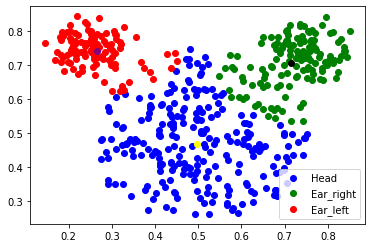

After 3 Iteration (Head , Ear_Right, Ear_Left) = (239 ,138, 113)


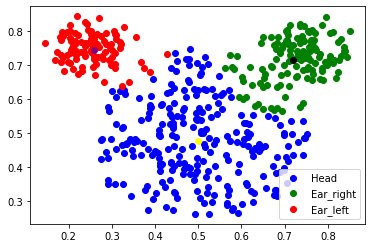

After 4 Iteration (Head , Ear_Right, Ear_Left) = (253 ,131, 106)


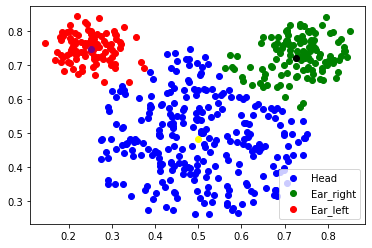

After 5 Iteration (Head , Ear_Right, Ear_Left) = (266 ,121, 103)


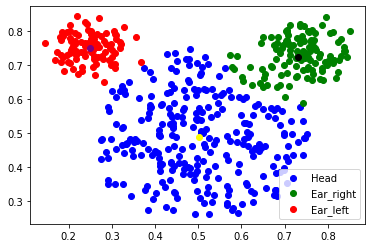

After 6 Iteration (Head , Ear_Right, Ear_Left) = (270 ,119, 101)


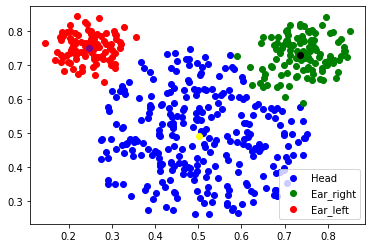

After 7 Iteration (Head , Ear_Right, Ear_Left) = (276 ,114, 100)


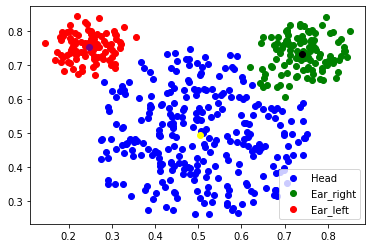

After 8 Iteration (Head , Ear_Right, Ear_Left) = (280 ,111, 99)


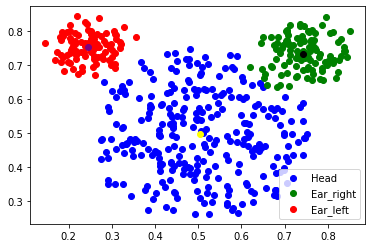

After 9 Iteration (Head , Ear_Right, Ear_Left) = (283 ,108, 99)


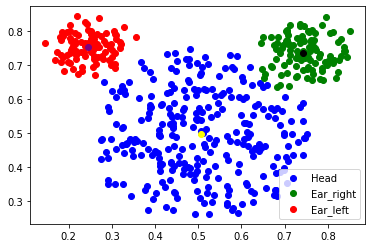

After 10 Iteration (Head , Ear_Right, Ear_Left) = (285 ,106, 99)


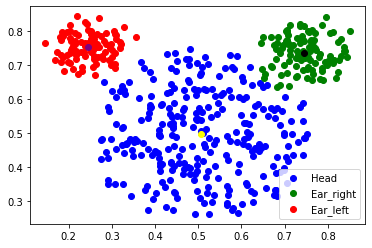

After 11 Iteration (Head , Ear_Right, Ear_Left) = (285 ,106, 99)


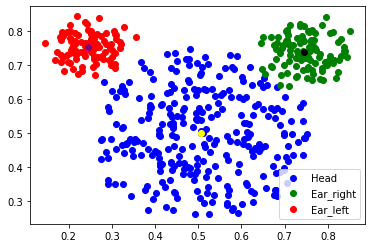

After 12 Iteration (Head , Ear_Right, Ear_Left) = (287 ,104, 99)


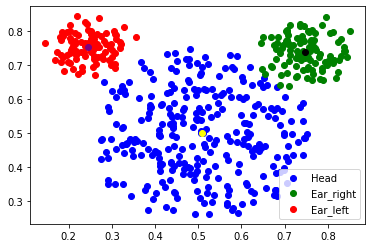

After 13 Iteration (Head , Ear_Right, Ear_Left) = (287 ,104, 99)


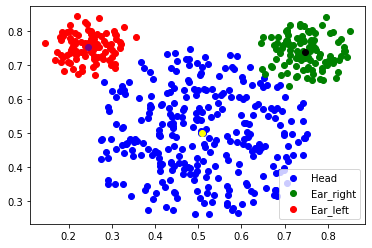

After 14 Iteration (Head , Ear_Right, Ear_Left) = (288 ,103, 99)


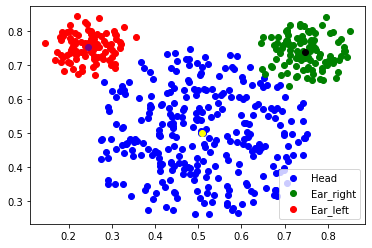

After 15 Iteration (Head , Ear_Right, Ear_Left) = (288 ,103, 99)


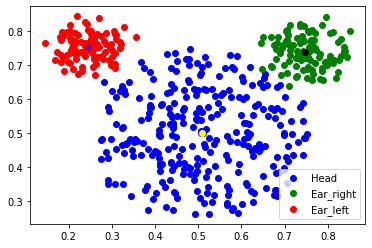

After 16 Iteration (Head , Ear_Right, Ear_Left) = (289 ,102, 99)


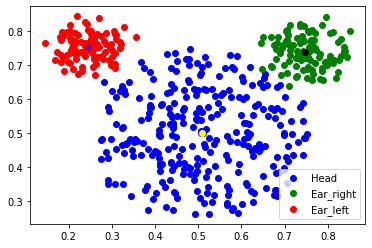

After 17 Iteration (Head , Ear_Right, Ear_Left) = (289 ,102, 99)


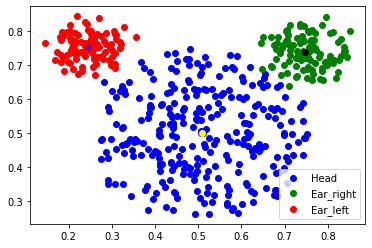

After 18 Iteration (Head , Ear_Right, Ear_Left) = (289 ,102, 99)


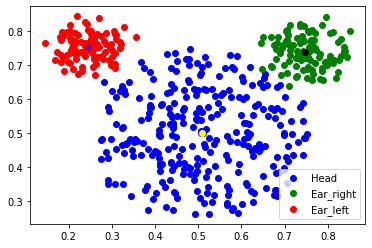

After 19 Iteration (Head , Ear_Right, Ear_Left) = (289 ,102, 99)


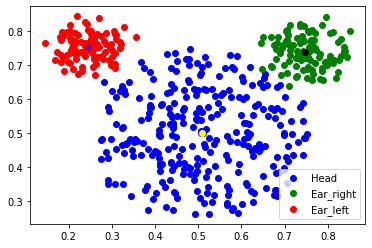

After 20 Iteration (Head , Ear_Right, Ear_Left) = (289 ,102, 99)


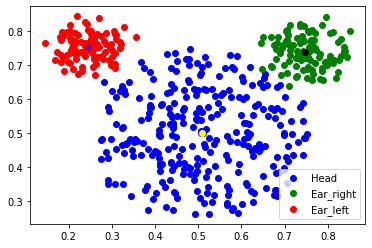

After 21 Iteration (Head , Ear_Right, Ear_Left) = (289 ,102, 99)


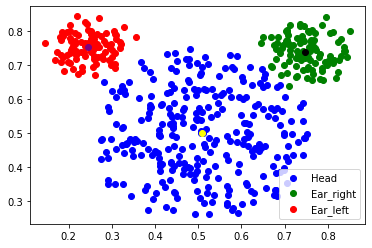

After 22 Iteration (Head , Ear_Right, Ear_Left) = (290 ,101, 99)


In [23]:
# Running EM Algorithm
muHD_x_prev = 0
muHD_y_prev = 0
muER_x_prev = 0
muER_y_prev = 0
muEL_x_prev = 0
muEL_y_prev = 0
diff_HD_X = 1
diff_HD_Y = 1
diff_ER_X = 1
diff_ER_Y = 1
diff_EL_X = 1
diff_EL_Y = 1
lim = 10**(-6)

i=0

while((diff_HD_X >= lim) and (diff_HD_Y >= lim) and (diff_ER_X >= lim) and (diff_ER_Y >= lim) and (diff_EL_X >= lim) and (diff_EL_Y >= lim)):
  i+=1
  muHD,muER,muEL, w_0,w_1,w_2, sigmaHD, sigmaER, sigmaEL = MStep(gm,cluster_data)
  li = plot_graph(muHD,muER,muEL,gm,cluster_data)
  gm = EStep(muHD,muER,muEL, w_0,w_1,w_2, sigmaHD, sigmaER, sigmaEL, cluster_data)
  print('After {0} Iteration (Head , Ear_Right, Ear_Left) = ({1} ,{2}, {3})'.format(i, li[0], li[1], li[2]))


  diff_HD_X = abs(muHD_x_prev - muHD[0])
  muHD_x_prev = muHD[0]

  diff_HD_Y = abs(muHD_y_prev - muHD[1])
  muHD_y_prev = muHD[1]

  diff_ER_X = abs(muER_x_prev - muER[0])
  muER_x_prev = muER[0]

  diff_ER_Y = abs(muER_y_prev - muER[1])
  muER_y_prev = muER[1]

  diff_EL_X = abs(muEL_x_prev - muEL[0])
  muEL_x_prev = muEL[0]

  diff_EL_Y = abs(muHD_y_prev - muEL[1])
  muEL_y_prev = muEL[1]
  

In [24]:
for i,j in zip(gm, cluster_data):
  k = i.index(max(i))
  if(k == 0):
    print(j[0] ,j[1], "Head")
  elif(k == 1):
    print(j[0] ,j[1], "Ear_Right")
  else:
    print(j[0], j[1], "Ear_Left")

0.45660137634625386 0.43280640922410835 Head
0.6113784672224188 0.5286245988894975 Head
0.6390150501606866 0.46074398219372076 Head
0.6289567839292338 0.32346951478531516 Head
0.5662104392361843 0.289357728041304 Head
0.5676530359179894 0.29547265797376954 Head
0.43602399117606827 0.4157757274892156 Head
0.5454137939219365 0.36750178191490135 Head
0.4394528077596546 0.5478674292772121 Head
0.512200437106122 0.500864646508404 Head
0.5218570283765972 0.5769060811333763 Head
0.7194189575585879 0.43648093863144677 Head
0.4982241475102956 0.42839983794125985 Head
0.2740522921447801 0.4804320598631085 Head
0.38284021717487404 0.5440688862962566 Head
0.4249231989421871 0.284825727537369 Head
0.5207238207675212 0.32542733595644696 Head
0.44329557666585284 0.32697891986066585 Head
0.39882121731993425 0.44917757772100975 Head
0.5043499801956989 0.31104972990661883 Head
0.6418316378383897 0.44634230241629513 Head
0.3875139053807079 0.5835776682759641 Head
0.3939936115953249 0.4355492315286958 Hea